**Description**:

Compute the figure 4 of the article: Sound spectrogram and waveform (with zoom).

-------------------------------------------------------------------------
Author: Luciano Martinez Rau (Mid Sweden University - sinc(<i>i</i>)-CONICET)------------------------------------------------------------------------

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
from scipy.io.wavfile import read
import os
import getpass

password = getpass.getpass()
command= "sudo -S apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended"
os.system('echo %s | %s' % (password, command))

[sudo] password for luciano: 



Reading package lists...
Building dependency tree...
Reading state information...
cm-super is already the newest version (0.3.4-15).
dvipng is already the newest version (1.15-1.1).
texlive-latex-extra is already the newest version (2019.202000218-1).
texlive-latex-recommended is already the newest version (2019.20200218-1).
0 to upgrade, 0 to newly install, 0 to remove and 147 not to upgrade.
1 not fully installed or removed.
After this operation, 0 B of additional disk space will be used.
Do you want to continue? [Y/n] Abort.


256

**Specify the path of the label files**

In [3]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/drive',force_remount=True)
    directory = "/drive/MyDrive/Colab Notebooks/DatabaseMichigan/"
else:
    directory = ''

wav_directory = directory + 'data/'
fig_directory = directory + 'fig/'

/tmp/ipykernel_433254/1575641998.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data  = read(wav_directory+"fig_grazing.wav")
/tmp/ipykernel_433254/1575641998.py:46: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data  = read(wav_directory+"fig_rumination.wav")


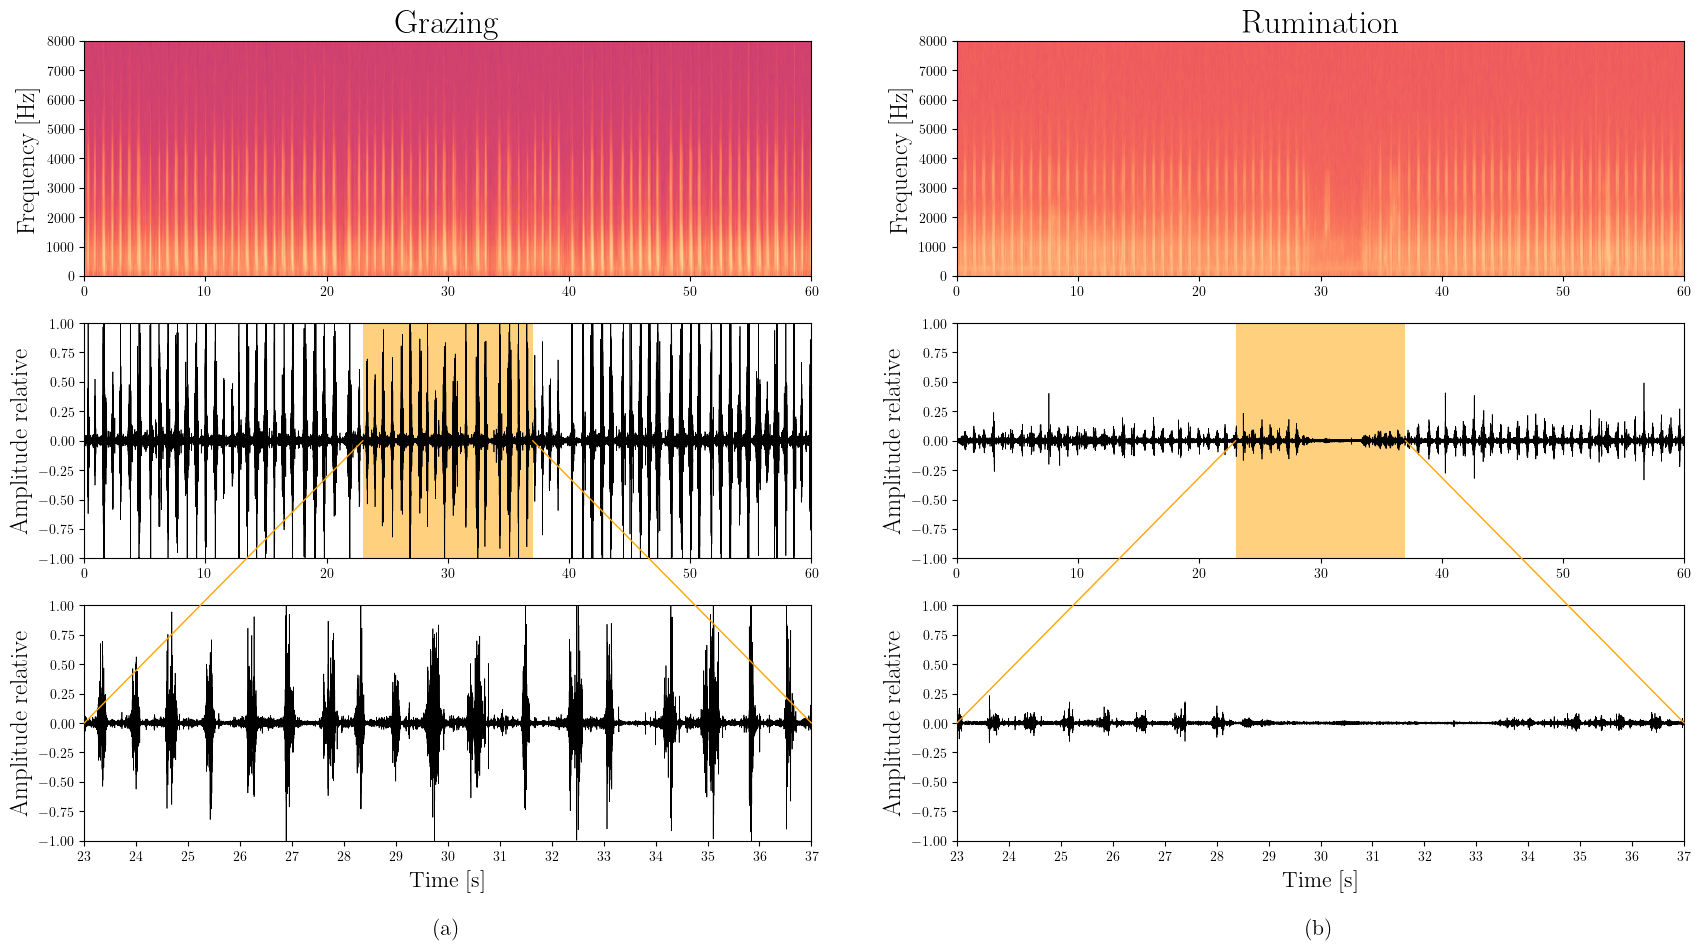

In [6]:
samplerate, data  = read(wav_directory+"fig_grazing.wav")

length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])
audio = data.astype(np.float32, order='C') / 32768.0

fig = plt.figure(figsize=(16, 8))
plt.rcParams['text.usetex'] = True
font = {'family':'serif', 'serif': ['computer modern roman']}
plt.rc('font',**font)

plt.subplots_adjust(bottom = 0., left = 0, top = 1., right = 1)
sub1 = fig.add_subplot(3,2,5) 
sub1.plot(time,audio, color = 'black',linewidth=0.5)
sub1.set_xlim(23,37)
sub1.set_xticks(np.arange(23,37.1, step=1))
sub1.set_xlabel("Time [s]\n\n(a)", labelpad = 5, fontsize=16)
sub1.set_ylim(-1, 1)
sub1.set_ylabel("Amplitude relative", labelpad = 5, fontsize=18)

sub2 = fig.add_subplot(3,2,3) 
sub2.plot(time, audio, color = 'black',linewidth=0.5)
sub2.set_xlim(0, 60)
sub2.set_ylim(-1, 1)

sub2.set_ylabel("Amplitude relative", labelpad = 5, fontsize=18)
sub2.fill_between((23,37), -1, 1, facecolor='Orange', alpha=0.5)

con1 = ConnectionPatch(xyA=(23, 0), coordsA=sub1.transData,
                       xyB=(23, 0), coordsB=sub2.transData, color = 'Orange')
fig.add_artist(con1)
con2 = ConnectionPatch(xyA=(37, 0), coordsA=sub1.transData, 
                       xyB=(37, 0), coordsB=sub2.transData, color = 'Orange')
fig.add_artist(con2)

sub3 = fig.add_subplot(3,2,1) 
sub3.specgram(data,Fs=samplerate,cmap='magma', mode='psd')
sub3.set_ylabel("Frequency [Hz]", labelpad = 5, fontsize=18)
sub3.set_xlim(0,60)
sub3.set_ylim(0, 8e3)
sub3.title.set_text('Grazing')
sub3.title.set_fontsize(24)


#Rumination
samplerate, data  = read(wav_directory+"fig_rumination.wav")

#delay to center the signal
# data =  np.delete(data, np.arange(round(1.5*samplerate)))

length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])
audio = data.astype(np.float32, order='C') / 32768.0


plt.subplots_adjust(bottom = 0., left = 0, top = 1., right = 1)
sub4 = fig.add_subplot(3,2,6) 
sub4.plot(time,audio, color = 'black',linewidth=0.5)
sub4.set_xlim(23,37)
sub4.set_xticks(np.arange(23,37.1, step=1))
sub4.set_ylim(-1, 1)
sub4.set_xlabel("Time [s]\n\n(b)", labelpad = 5, fontsize=16)
sub4.set_ylabel("Amplitude relative", labelpad = 5, fontsize=18)

sub5 = fig.add_subplot(3,2,4) 
sub5.plot(time, audio, color = 'black',linewidth=0.5)
sub5.set_xlim(0, 60)
sub5.set_ylim(-1, 1)
sub5.set_ylabel("Amplitude relative", labelpad = 5, fontsize=18)
sub5.fill_between((23,37), -1, 1, facecolor='Orange', alpha=0.5)

con3 = ConnectionPatch(xyA=(23, 0), coordsA=sub4.transData,
                       xyB=(23, 0), coordsB=sub5.transData, color = 'Orange')
fig.add_artist(con3)
con4 = ConnectionPatch(xyA=(37, 0), coordsA=sub4.transData, 
                       xyB=(37, 0), coordsB=sub5.transData, color = 'Orange')
fig.add_artist(con4)

sub6 = fig.add_subplot(3,2,2) 
sub6.title.set_text('Rumination')
sub6.title.set_fontsize(24)
sub6.specgram(data,Fs=samplerate,cmap='magma', mode='psd')
sub6.set_ylabel("Frequency [Hz]", labelpad = 5, fontsize=18)
sub6.set_xlim(0,60)
sub6.set_ylim(0, 8e3)

plt.savefig(fig_directory + 'fig4.jpg', dpi = 600,transparent=True,bbox_inches='tight')
plt.savefig(fig_directory + 'fig4.pdf', dpi = 600,transparent=True,bbox_inches='tight')